In [1]:
import os
# os.environ['APP_HOST'] = 'http://192.168.60.25:8005'
os.environ['USER_ID'] = 'abbd86d4-d3c0-48d4-be5a-a6cefd22002b'
os.environ['PROJECT_ID'] = '9d9bca30-a314-4f93-b9c2-f368a0b0135b'
os.environ['TENANT_ID'] = 'cb7d3189-7b2d-4d72-951f-a70a79931f52'

import sys
sys.version
sys.path.append('/Users/phaneendra/IdeaProjects/razor-sdk')

In [2]:
from razor import Block, Pipeline, inputs, outputs

Couldn't setup host configurations. You may not be running this in the platform's Jupyter
Failed to load configuration file. Using default configs


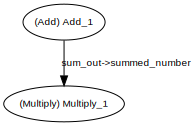

In [3]:
import razor
from razor import Block, inputs, outputs, Pipeline
from razor.platform import project_space_path

@inputs.atomic.generic('numbers')
@outputs.series.generic('sum_out')
class Add(Block):
    def run(self, numbers, sum_out):
        sum_out.put(sum(numbers))
        sum_out.put(2)
        
@inputs.series.generic('summed_number')
@inputs.atomic.generic('factor')
@outputs.atomic.generic('result')
class Multiply(Block):
    def run(self, summed_number, factor, result):
        print(f"Multiply sumnuber, factor: {summed_number} {factor}")
        for x in summed_number:
            print(f"Nuber is: {x}")
            result.put(x*factor)
        
add = (
    Add()
    .numbers(variable='numbers')
)

mul = (
    Multiply()
    .summed_number(add.sum_out)
    .factor(variable='factor')
)

p = Pipeline(name='PipelineVars', targets=[mul])
p.show()

deployed_pipeline = razor.platform.engines(name='Engine-1-dev1').execute(pipeline=p, pipeline_vars={
    "numbers": [1, 2, 3],
    "factor": 5
})

# pipeline = Pipeline(targets=[csv_writer], name="hima_pipeline")
# pipeline.show()



In [4]:
# import razor
# deployed_pipeline= razor.platform.engines(name='Engine-1-dev1').execute(pipeline=pipeline)

In [5]:
deployed_pipeline.monitor()

deployed_pipeline.metrics().plot()

Pipeline Progress: [####################] 100.0% - Success


alt.VConcatChart(...)

In [6]:
deployed_pipeline.logs()

'No logs available yet. Check back again in sometime.'

In [7]:
# deployed.monitor()